In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import differential_evolution
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import entropy
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import warnings

In [2]:
# Suprimir un warning específico (por ejemplo, el warning de UserWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
##Visualizacion del dataset
df = pd.read_csv(r'rtfDataSet.csv', header=0)
df

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,label
0,-0.536000,0.292000,-0.684000,0.123000,-0.118000,0.346000,-0.308000,-0.113000,0.401000,-0.399000,...,-0.135000,-0.063000,-0.410000,-0.223000,-0.599000,-0.136000,-0.329000,-0.132000,-0.266000,0
1,-0.496000,-0.298000,-0.529000,0.073000,-0.072000,0.107000,-0.316000,-0.066000,-0.168000,-0.099000,...,0.189000,0.007000,-0.362000,-0.151000,-0.338000,-0.031000,-0.159000,-0.097000,-0.131000,0
2,0.008000,-0.031000,-0.240000,0.178000,-0.120000,0.317000,-0.481000,0.031000,-0.077000,0.063000,...,-0.035000,0.101000,-0.098000,-0.172000,-0.290000,0.033000,-0.342000,-0.321000,-0.238000,0
3,-0.188000,-0.180000,-0.062000,-0.104000,-0.136000,-0.061000,-0.216000,-0.143000,0.068000,-0.189000,...,0.146000,-0.145000,-0.527000,-0.292000,-0.663000,-0.078000,-0.194000,-0.151000,-0.268000,0
4,0.038000,0.155000,-0.203000,-0.088000,-0.084000,-0.164000,-0.145000,-0.168000,0.008000,0.143000,...,0.019000,-0.084000,0.164000,-0.165000,-0.126000,-0.112000,0.029000,-0.138000,0.148000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.074967,-0.127350,-0.240811,-0.037584,0.035714,-0.431190,-0.154309,0.160049,-0.172790,0.146073,...,0.280726,-0.228779,0.195978,0.319949,0.521700,0.160157,0.226597,-0.052955,-0.098770,1
392,0.664006,-0.028111,-0.179418,-0.070884,0.048793,-0.001349,-0.187850,-0.000023,-0.260852,0.111592,...,-0.016521,-0.193006,0.130795,-0.001237,0.016746,-0.015542,0.273885,0.175237,-0.039909,1
393,-0.234197,-0.058229,-0.553610,-0.097793,-0.157780,0.226956,0.416572,-0.005744,-0.068708,-0.166337,...,0.231451,-0.174647,-0.396817,-0.260318,-0.440378,-0.063138,-0.386871,-0.627228,-0.142251,1
394,0.274072,-0.105900,0.203276,-0.061067,-0.100202,-0.404380,-0.085191,-0.036268,-0.253699,0.036598,...,0.157804,-0.054686,0.473430,0.117017,0.192226,0.084721,-0.029949,0.167364,0.000677,1


### Normalización

In [4]:
##Separacion en X y Y (utilizando)
X=df.iloc[:,:-1]
Y=df.iloc[:, -1]

#Objeto normalizador
scaler=MinMaxScaler()
#Se normaliza
X_norm=scaler.fit_transform(X)
#Visualizacion de X normalizado
X_norm = pd.DataFrame(X_norm)
X_norm


,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.294244,0.705043,0.183047,0.610883,0.287570,0.806475,0.179009,0.499009,0.890763,0.184259,...,0.448750,0.378264,0.459459,0.300824,0.339323,0.180758,0.348815,0.324151,0.526825,0.128294
1,0.315761,0.143673,0.263651,0.559548,0.330241,0.630611,0.174344,0.522299,0.433735,0.462037,...,0.462500,0.606916,0.529530,0.333791,0.389081,0.332945,0.448341,0.433056,0.543741,0.221914
2,0.586875,0.397716,0.413937,0.667351,0.285714,0.785136,0.078134,0.570367,0.506827,0.612037,...,0.530250,0.448836,0.623624,0.515110,0.374568,0.360933,0.509005,0.315823,0.435476,0.147712
3,0.481442,0.255947,0.506500,0.377823,0.270872,0.506990,0.232653,0.484143,0.623293,0.378704,...,0.464750,0.576570,0.377377,0.220467,0.291638,0.143440,0.403791,0.410634,0.517641,0.126907
4,0.603012,0.574691,0.433177,0.394251,0.319109,0.431199,0.274052,0.471754,0.575100,0.686111,...,0.475750,0.486944,0.438438,0.695055,0.379406,0.456560,0.371564,0.553491,0.523925,0.415395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.622898,0.306042,0.413515,0.446012,0.430161,0.234592,0.268624,0.634316,0.429888,0.688956,...,0.588026,0.671649,0.293515,0.717018,0.714547,0.834227,0.629533,0.680075,0.565029,0.244265
392,0.939756,0.400465,0.445440,0.411823,0.442294,0.550884,0.249067,0.554994,0.359155,0.657030,...,0.465734,0.461876,0.329323,0.672249,0.492580,0.539794,0.462993,0.710368,0.675320,0.285084
393,0.456591,0.371809,0.250853,0.384196,0.250668,0.718879,0.601500,0.552159,0.513488,0.399688,...,0.632761,0.636874,0.347701,0.309878,0.313533,0.273249,0.417879,0.287078,0.287468,0.214112
394,0.730001,0.326451,0.644449,0.421902,0.304080,0.254319,0.308927,0.537033,0.364900,0.587591,...,0.592278,0.584900,0.467782,0.907576,0.574303,0.642114,0.558029,0.515728,0.671515,0.313230


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=42)

### Funcion de filtro (funcion objetiva para el wrapper)

In [6]:
def objective_function(selected_features):
    # Convert binary vector to feature indices
    selected_indices = np.where(selected_features)[0]

    # Calculate Gain Ratio for the selected features
    info_gain = mutual_info_classif(X_train.iloc[:, selected_indices], Y_train, discrete_features='auto')
    intrinsic_info = [entropy(X_train.iloc[:, i]) for i in selected_indices]
    
    # Calculate Gain Ratio as the fitness score
    gain_ratio = [ig / ii if ii > 0 else 0 for ig, ii in zip(info_gain, intrinsic_info)]
    
    # Sum the Gain Ratios to get the overall fitness score (maximize Gain Ratio)
    fitness = sum(gain_ratio)
    
    return -fitness  # Minimize the negative fitness (maximize Gain Ratio)

### Función wrapper 

In [7]:
# Define a wrapper function
def feature_selection_wrapper(X, Y, num_sets=5):
    # Initialize a list to store selected feature subsets
    selected_feature_subsets = []

    # Perform feature selection multiple times to generate different sets
    for _ in range(num_sets):

        # Define the bounds for feature selection
        bounds = [(0, 1)] * np.array(X).shape[1]

        # Perform differential evolution feature selection
        result = differential_evolution(objective_function, bounds, maxiter=100, popsize=15, recombination=0.7)

        # Extract the best feature subset
        #best_feature_subset = np.where(result.x > 0.70)[0]

        # Store the selected feature subset
        selected_feature_subsets.append(result)

    return selected_feature_subsets

# Example usage:
# Replace X and Y with your dataset and target variable
# num_sets is the number of feature subsets to generate
num_sets = 5
selected_feature_subsets = feature_selection_wrapper(X_train, Y_train, num_sets)

# Print the selected feature subsets
for i, subset in enumerate(selected_feature_subsets):
    print(f"Set {i + 1} - Selected Features:", subset)

Set 1 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.39902175460405886
       x: [ 3.377e-01  9.037e-01 ...  6.205e-01  1.860e-01]
     nit: 1
    nfev: 4088
Set 2 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.39853340891193295
       x: [ 4.471e-01  4.716e-01 ...  4.834e-01  1.163e-01]
     nit: 1
    nfev: 4585
Set 3 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.3996418583250205
       x: [ 6.876e-01  8.966e-01 ...  4.635e-01  7.262e-01]
     nit: 1
    nfev: 4017
Set 4 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.39847620723369664
       x: [ 2.478e-01  2.460e-01 ...  9.658e-02  6.228e-01]
     nit: 1
    nfev: 4088
Set 5 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.39799979872646457
       x: [ 4.453e-01  4.423e-01 ...  5.274e-02 

### Top 5 subsets de caracteristicas

In [8]:
min_num_features = 10

top5_features = []  # List to store the selected features (at least 10)
additional_features = []  # List to store additional important features if needed

for i, subset in enumerate(selected_feature_subsets):
    # Find features with importance greater than 0.75
    selected_indices = np.where(subset.x > 0.75)[0]
    
    # Check if the selected subset has at least 10 features with importance above 0.75
    if len(selected_indices) >= min_num_features:
        selected_features = selected_indices  # Take all features above 0.75
    else:
        # If there are fewer than 10 features, add all features above 0.75 and select additional important features
        selected_features = selected_indices.tolist()  # Start with features above 0.75
        remaining_features_needed = min_num_features - len(selected_indices)
        
        # Sort remaining features by importance (descending)
        remaining_features = np.argsort(-subset.x)
        
        # Exclude features already selected
        remaining_features = [f for f in remaining_features if f not in selected_features]
        
        # Add additional features above 0.75 to reach the required count
        for feature in remaining_features:
            selected_features.append(feature)
            if len(selected_features) >= min_num_features:
                break
        
        # Store the additional features for this subset
        additional_features.append(remaining_features[:remaining_features_needed])
    
    # Append the selected features to the final list
    top5_features.append(selected_features)
    
    # Print the results for each set
    print(f"Set {i + 1}")
    print("Selected Features:", selected_features)
    formatted_importance = [f"{imp:.3f}" for imp in subset.x[selected_features]]
    print(f"Importance ranking:", formatted_importance)
    print(f"Fitness score:", -subset.fun, "\n")


Set 1
Selected Features: [ 1  5 10 13 14 16 17 19 25 26 29 30 36 46 51 57]
Importance ranking: ['0.904', '0.981', '0.786', '0.872', '0.899', '0.840', '0.761', '0.792', '0.820', '0.875', '0.961', '0.930', '0.889', '0.920', '0.966', '0.894']
Fitness score: 0.39902175460405886 

Set 2
Selected Features: [ 2  5  9 10 16 21 28 34 38 48 49 55 61 62 64]
Importance ranking: ['0.840', '0.851', '0.977', '0.976', '0.869', '0.831', '0.961', '0.762', '0.926', '0.928', '0.837', '0.755', '0.882', '0.913', '0.760']
Fitness score: 0.39853340891193295 

Set 3
Selected Features: [ 1  2  7  8  9 10 19 23 28 34 35 36 42 44 45 47 48 49 53 55 56 57 58 63
 64 65 67]
Importance ranking: ['0.897', '0.824', '0.808', '0.906', '0.769', '0.868', '0.901', '0.800', '0.788', '0.817', '0.946', '0.986', '0.885', '0.757', '0.778', '0.958', '0.801', '0.785', '0.774', '0.797', '0.775', '0.893', '0.929', '0.843', '0.809', '0.988', '0.958']
Fitness score: 0.3996418583250205 

Set 4
Selected Features: [ 2  3 12 16 21 23 28 34

### Clasificador

In [9]:
# Number of splits (cross-validation folds)
n_splits = 5  # You can adjust this as needed

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store the best and mean AUC scores for each subset
best_aucs = []
mean_aucs = []

# Loop through the selected feature subsets
for i, selected_features in enumerate(top5_features):
    # Convert selected_features to a NumPy array of integers
    selected_features = np.array(selected_features)
    
    # Initialize a list to store cross-validation ROC AUC scores
    cv_auc_scores = []
    
    # Perform cross-validation
    for train_idx, test_idx in cv.split(X, Y):
        X_train_subset, X_test_subset = X.iloc[train_idx, selected_features], X.iloc[test_idx, selected_features]
        Y_train_subset, Y_test_subset = Y.iloc[train_idx], Y.iloc[test_idx]
        
        # Initialize and train an LDA classifier
        lda_classifier = LDA()
        lda_classifier.fit(X_train_subset, Y_train_subset)
        
        # Make predictions on the test set
        y_pred = lda_classifier.predict_proba(X_test_subset)[:, 1]
        
        # Evaluate the classifier using ROC AUC
        auc = roc_auc_score(Y_test_subset, y_pred)
        
        # Append the cross-validation ROC AUC score to the list
        cv_auc_scores.append(auc)
    
    # Calculate the best AUC score for this subset
    best_auc = max(cv_auc_scores)
    best_aucs.append(best_auc)
    
    # Calculate the mean AUC score for this subset
    mean_auc = np.mean(cv_auc_scores)
    mean_aucs.append(mean_auc)
    
    # Print the results for each subset
    print(f"Subset {i + 1}")
    print("Selected Features:", selected_features)
    print(f"Best ROC AUC: {best_auc:.6f}")
    print(f"Mean ROC AUC: {mean_auc:.6f}\n")


Subset 1
Selected Features: [ 1  5 10 13 14 16 17 19 25 26 29 30 36 46 51 57]
Best ROC AUC: 0.742619
Mean ROC AUC: 0.706898

Subset 2
Selected Features: [ 2  5  9 10 16 21 28 34 38 48 49 55 61 62 64]
Best ROC AUC: 0.793590
Mean ROC AUC: 0.737908

Subset 3
Selected Features: [ 1  2  7  8  9 10 19 23 28 34 35 36 42 44 45 47 48 49 53 55 56 57 58 63
 64 65 67]
Best ROC AUC: 0.836538
Mean ROC AUC: 0.769757

Subset 4
Selected Features: [ 2  3 12 16 21 23 28 34 35 45 48 50 53 61]
Best ROC AUC: 0.744215
Mean ROC AUC: 0.686453

Subset 5
Selected Features: [ 2 10 11 12 14 22 36 41 46 50 55 56 57 58 65]
Best ROC AUC: 0.757051
Mean ROC AUC: 0.729296



## Obtención de los 5 mejores subsets con el coeficiente de correlación de Pearson

In [10]:
correlation_matrix = X_norm.corr()
correlation_matrix

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,1.000000,-0.139094,0.086157,-0.133410,0.161651,-0.319882,0.157946,0.241017,-0.273206,0.214579,...,0.207288,0.165138,-0.161093,0.345192,0.242913,0.386003,0.173019,0.269510,0.110476,0.247149
1,-0.139094,1.000000,-0.164955,-0.026919,-0.143584,0.260135,0.037288,-0.103438,0.293263,0.000211,...,-0.244776,-0.246472,0.086587,-0.047128,-0.020811,-0.078022,-0.256147,-0.096334,0.010273,-0.053607
2,0.086157,-0.164955,1.000000,0.117282,-0.065671,-0.076323,0.070797,0.028218,-0.210709,-0.003367,...,0.070516,0.204802,0.046124,0.125444,0.034234,0.053841,0.039642,0.021564,0.204044,0.131386
3,-0.133410,-0.026919,0.117282,1.000000,-0.197696,0.531012,-0.215297,-0.040392,0.019640,-0.321334,...,-0.213700,0.051790,0.017327,-0.289460,-0.308870,-0.318008,-0.107789,-0.258292,0.083759,-0.155700
4,0.161651,-0.143584,-0.065671,-0.197696,1.000000,-0.278390,0.237739,0.242038,0.006435,0.253264,...,0.245330,-0.003519,0.049367,0.337995,0.409213,0.440414,0.094386,0.517534,0.067117,0.139816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.386003,-0.078022,0.053841,-0.318008,0.440414,-0.567242,0.293299,0.391574,-0.340181,0.638191,...,0.391526,0.146695,-0.067916,0.802916,0.590647,1.000000,0.117078,0.672628,0.172689,0.244843
66,0.173019,-0.256147,0.039642,-0.107789,0.094386,-0.151447,-0.064816,0.174076,-0.246511,0.201447,...,0.219592,0.190843,-0.160805,0.165591,0.145514,0.117078,1.000000,0.032170,0.165642,0.022570
67,0.269510,-0.096334,0.021564,-0.258292,0.517534,-0.425625,0.308032,0.254018,-0.191319,0.610281,...,0.293342,0.081482,0.047409,0.657446,0.560564,0.672628,0.032170,1.000000,0.232473,0.292176
68,0.110476,0.010273,0.204044,0.083759,0.067117,0.019635,-0.028122,0.135756,-0.150232,0.166060,...,0.091128,0.098239,-0.110068,0.255985,0.138786,0.172689,0.165642,0.232473,1.000000,0.116847


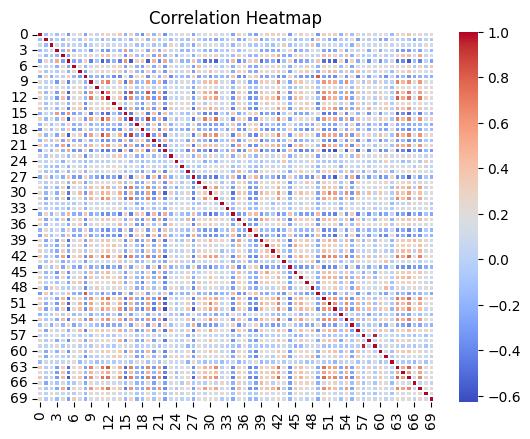

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.01)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
correlation_matrix_filtered = correlation_matrix[correlation_matrix.abs() > 0.8]
correlation_matrix_filtered

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.802916,NaN,1.0,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


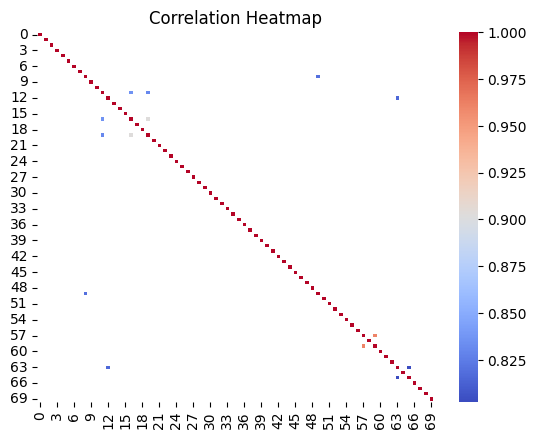

In [13]:
sns.heatmap(correlation_matrix_filtered, annot=False, cmap='coolwarm', linewidths=0.01)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
features_to_drop = []

for col in correlation_matrix_filtered.columns:
    # Create a boolean mask to select correlated features
    correlated_features = correlation_matrix_filtered.index[correlation_matrix_filtered[col] > 0.8].tolist()
    
    for feature in correlated_features:
        if feature != col and feature not in features_to_drop:
            features_to_drop.append(feature)

# Drop the correlated features from your DataFrame
df_dropped = X_norm.drop(columns=features_to_drop)
print(df_dropped)

           0         1         2         3         4         5         6   \
0    0.294244  0.705043  0.183047  0.610883  0.287570  0.806475  0.179009   
1    0.315761  0.143673  0.263651  0.559548  0.330241  0.630611  0.174344   
2    0.586875  0.397716  0.413937  0.667351  0.285714  0.785136  0.078134   
3    0.481442  0.255947  0.506500  0.377823  0.270872  0.506990  0.232653   
4    0.603012  0.574691  0.433177  0.394251  0.319109  0.431199  0.274052   
..        ...       ...       ...       ...       ...       ...       ...   
391  0.622898  0.306042  0.413515  0.446012  0.430161  0.234592  0.268624   
392  0.939756  0.400465  0.445440  0.411823  0.442294  0.550884  0.249067   
393  0.456591  0.371809  0.250853  0.384196  0.250668  0.718879  0.601500   
394  0.730001  0.326451  0.644449  0.421902  0.304080  0.254319  0.308927   
395  0.390398  0.362003  0.423761  0.447160  0.316800  0.500604  0.683802   

           7         9         10  ...        56        58        60  \
0  

In [15]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df_dropped, Y, test_size=0.2, random_state=42)

In [16]:
num_sets = 5
selected_feature_subsets2 = feature_selection_wrapper(X_train2, Y_train2, num_sets)

# Print the selected feature subsets
for i, subset in enumerate(selected_feature_subsets2):
    print(f"Set {i + 1} - Selected Features:", subset)

Set 1 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.3610173707408375
       x: [ 1.971e-02  6.386e-01 ...  1.730e-01  7.266e-02]
     nit: 1
    nfev: 3630
Set 2 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.35925415163902696
       x: [ 8.109e-01  2.859e-01 ...  2.856e-01  3.026e-01]
     nit: 1
    nfev: 3447
Set 3 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.3642061496205121
       x: [ 9.111e-01  3.867e-01 ...  9.481e-01  7.911e-01]
     nit: 1
    nfev: 3752
Set 4 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.35906570348821437
       x: [ 8.376e-01  7.280e-02 ...  3.557e-01  6.222e-01]
     nit: 1
    nfev: 3569
Set 5 - Selected Features:  message: Optimization terminated successfully.
 success: True
     fun: -0.35956198733421424
       x: [ 7.003e-01  9.852e-01 ...  5.585e-01  

In [17]:
top5_features2 = []
for i, subset in enumerate(selected_feature_subsets2):
    top5_features2.append(np.where(subset.x > 0.75)[0])
    print(f"Set {i + 1} ")
    print(f"Selected Features:", np.where(subset.x > 0.75)[0])
    formatted_importance = [f"{imp:.3f}" for imp in subset.x[np.where(subset.x > 0.75)[0]]]
    print(f"Importance ranking:", formatted_importance)
    print(f"Fitness score:", -subset.fun, "\n")

Set 1 
Selected Features: [ 2  3  9 11 14 16 24 29 30 38 41 42 51]
Importance ranking: ['0.902', '0.775', '0.930', '0.937', '0.823', '0.971', '0.968', '0.849', '0.837', '0.887', '0.821', '0.870', '0.859']
Fitness score: 0.3610173707408375 

Set 2 
Selected Features: [ 0  2  5 11 17 19 20 22 24 25 29 41 45 52]
Importance ranking: ['0.811', '0.940', '0.806', '0.984', '0.857', '0.863', '0.756', '0.947', '0.950', '0.939', '0.780', '0.786', '0.750', '0.829']
Fitness score: 0.35925415163902696 

Set 3 
Selected Features: [ 0  7 12 15 16 20 27 35 37 38 41 58 59]
Importance ranking: ['0.911', '0.876', '0.819', '0.917', '0.824', '0.938', '0.960', '0.751', '0.932', '0.905', '0.810', '0.948', '0.791']
Fitness score: 0.3642061496205121 

Set 4 
Selected Features: [ 0  3  4  8 11 12 23 27 44 45 47 55 56]
Importance ranking: ['0.838', '0.988', '0.827', '0.983', '0.877', '0.849', '0.790', '0.877', '0.824', '0.842', '0.788', '0.834', '0.984']
Fitness score: 0.35906570348821437 

Set 5 
Selected Featur

In [18]:
for i, features in enumerate(top5_features2):
    lda_classifier = LDA()
    lda_classifier.fit(X_train2.iloc[:, features], Y_train2)
    print(f"Set {i + 1} ")
    print(f"ROC AUC score:", roc_auc_score(Y_test2, lda_classifier.predict_proba(X_test2.iloc[:, features])[:, 1]), "\n")

Set 1 
ROC AUC score: 0.7212276214833759 

Set 2 
ROC AUC score: 0.639386189258312 

Set 3 
ROC AUC score: 0.6553708439897699 

Set 4 
ROC AUC score: 0.7333759590792839 

Set 5 
ROC AUC score: 0.610613810741688 



In [19]:
# Assuming you have already defined the selected feature subsets in top5_features2
best_aucs2 = []  # To store the best AUC score for each subset
mean_aucs2 = []  # To store the mean AUC score for each subset

# Number of splits (cross-validation folds)
n_splits = 5  # You can adjust this as needed

# Initialize StratifiedKFold for cross-validation
cv2 = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Loop through the selected feature subsets
for i, selected_features in enumerate(top5_features2):
    # Convert selected_features to a NumPy array of integers
    selected_features = np.array(selected_features)
    
    # Initialize a list to store cross-validation ROC AUC scores
    cv_auc_scores = []
    
    # Perform cross-validation
    for train_idx, test_idx in cv2.split(X, Y):
        X_train_subset2, X_test_subset2 = X.iloc[train_idx, selected_features], X.iloc[test_idx, selected_features]
        Y_train_subset2, Y_test_subset2 = Y.iloc[train_idx], Y.iloc[test_idx]
        
        # Initialize and train an LDA classifier
        lda_classifier = LDA()
        lda_classifier.fit(X_train_subset2, Y_train_subset2)
        
        # Make predictions on the test set
        y_pred2 = lda_classifier.predict_proba(X_test_subset2)[:, 1]
        
        # Evaluate the classifier using ROC AUC
        auc2 = roc_auc_score(Y_test_subset2, y_pred2)
        
        # Append the cross-validation ROC AUC score to the list
        cv_auc_scores.append(auc2)
    
    # Calculate the best AUC score for this subset
    best_auc2 = max(cv_auc_scores)
    best_aucs2.append(best_auc2)
    
    # Calculate the mean AUC score for this subset
    mean_auc2 = np.mean(cv_auc_scores)
    mean_aucs2.append(mean_auc2)
    
    # Print the results for each subset
    print(f"Subset {i + 1}")
    print("Selected Features:", selected_features)
    print(f"Best ROC AUC: {best_auc:.6f}")
    print(f"Mean ROC AUC: {mean_auc:.6f}\n")

Subset 1
Selected Features: [ 2  3  9 11 14 16 24 29 30 38 41 42 51]
Best ROC AUC: 0.757051
Mean ROC AUC: 0.729296

Subset 2
Selected Features: [ 0  2  5 11 17 19 20 22 24 25 29 41 45 52]
Best ROC AUC: 0.757051
Mean ROC AUC: 0.729296

Subset 3
Selected Features: [ 0  7 12 15 16 20 27 35 37 38 41 58 59]
Best ROC AUC: 0.757051
Mean ROC AUC: 0.729296

Subset 4
Selected Features: [ 0  3  4  8 11 12 23 27 44 45 47 55 56]
Best ROC AUC: 0.757051
Mean ROC AUC: 0.729296

Subset 5
Selected Features: [ 1  3  4  5 12 13 19 21 27 30 31 32 37 38 40 43 46 51 54]
Best ROC AUC: 0.757051
Mean ROC AUC: 0.729296

